In [32]:
import seaborn as sns
import baltic as bt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

mpl.rcParams['font.family'] = 'Arial'

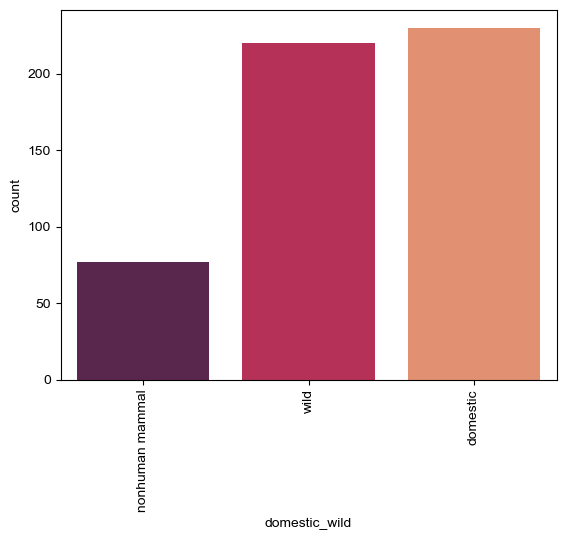

In [34]:
## Visaulize number of seqs per order in eqaul sample dataset (dom wild)
seqmetadata = pd.read_csv('526meta-domwild.csv')
sns.countplot(x='domestic_wild', data=seqmetadata, palette="rocket")
plt.xticks(rotation='vertical')
plt.savefig('domwild_count.pdf', format='pdf')
plt.show()


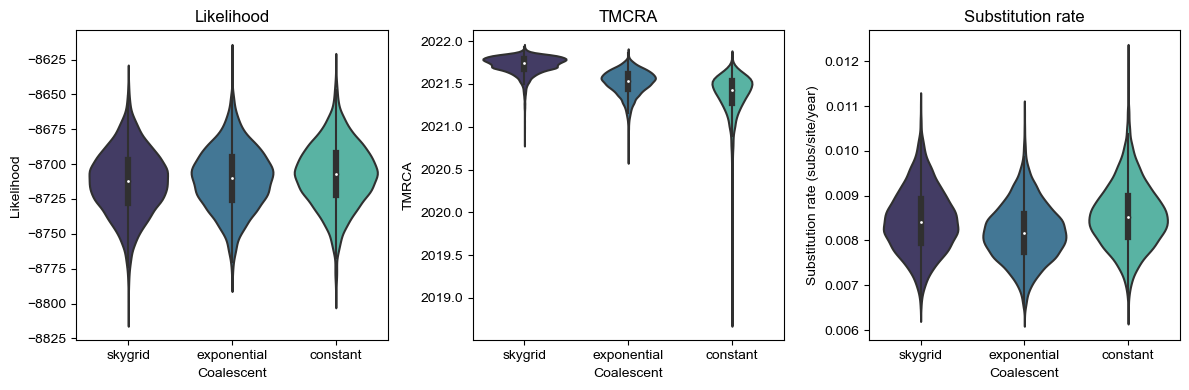

In [32]:
# Violin plots comparing each coalescent (domestic wild)

liklihood = pd.read_csv('Empirical-tree/results/runs_20230524/HPAI-emptrees-50mil-equalnum/likelihoodtable.tsv', sep='\t')
tmcra = pd.read_csv('Empirical-tree/results/runs_20230524/HPAI-emptrees-50mil-equalnum/rootagetable.tsv', sep='\t')
ucldmean = pd.read_csv('Empirical-tree/results/runs_20230524/HPAI-emptrees-50mil-equalnum/ucldmeantable.tsv', sep='\t')


liklihood_long = liklihood.melt(var_name='Coalescent', value_name='Likelihood')
tmcra_long = tmcra.melt(var_name='Coalescent', value_name='TMRCA')
ucldmean_long = ucldmean.melt(var_name='Coalescent', value_name='Substitution rate (subs/site/year)')


# Step 2: Create the violin plots for each file
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

sns.violinplot(x='Coalescent', y='Likelihood', data=liklihood_long, ax=axs[0], palette="mako")
sns.violinplot(x='Coalescent', y='TMRCA', data=tmcra_long, ax=axs[1],palette="mako")
sns.violinplot(x='Coalescent', y='Substitution rate (subs/site/year)', data=ucldmean_long, ax=axs[2], palette="mako")

# Customize the subplot arrangement
axs[0].set_title('Likelihood')
axs[1].set_title('TMCRA')
axs[2].set_title('Substitution rate')

# Adjust spacing between subplots
plt.tight_layout()

# Save the composite figure to a file
plt.savefig('composite_figure_dometicwild.pdf', format='pdf')

# Show the composite figure
plt.show()

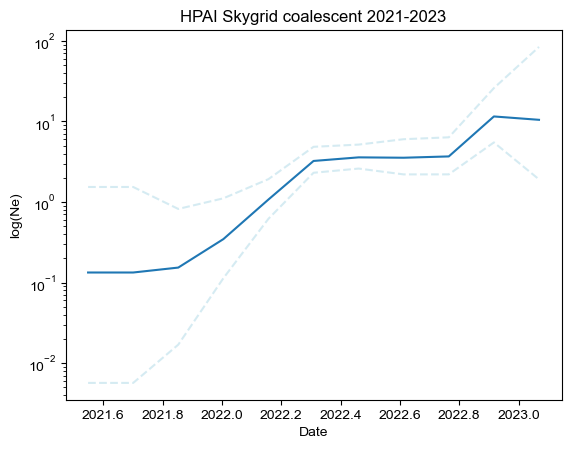

In [31]:
# skygrid plot
skygrid = pd.read_csv('Empirical-tree/results/runs_20230524/HPAI-emptrees-50mil-equalnum/skygrid/skygrid.tsv', sep='\t')
sns.lineplot(data=skygrid, x='time', y='median')
sns.lineplot(data=skygrid, x='time', y='lower', linestyle='--', color='lightblue', alpha=0.5)
sns.lineplot(data=skygrid, x='time', y='upper', linestyle='--', color='lightblue', alpha=0.5)

# Add labels and title
plt.yscale('log')
plt.xlabel('Date')
plt.ylabel('log(Ne)')
plt.title('HPAI Skygrid coalescent 2021-2023 - Domestic/wild')
plt.savefig('skygrid-recon.pdf', format='pdf')
# Show the plot
plt.show()

In [28]:
seqmetadata
pd.value_counts(seqmetadata['domestic_wild_x'])



domestic           434
U                  417
wild               221
nonhuman mammal     77
Name: domestic_wild_x, dtype: int64

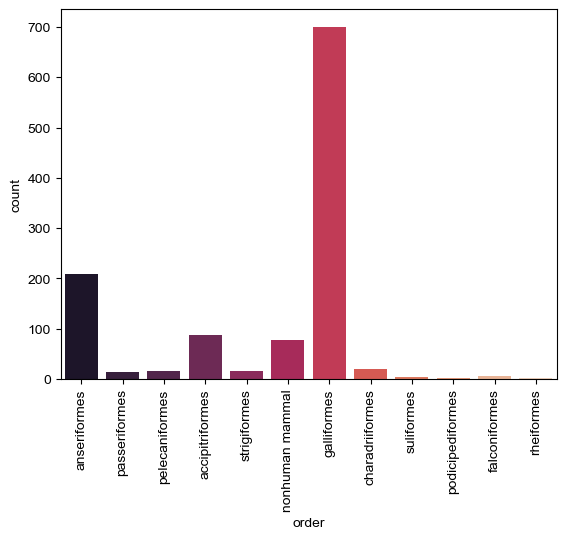

galliformes              702
anseriformes             208
accipitriformes_et_al    109
mammal                    77
charadriiformes_et_al     39
passeriformes             14
Name: order_cond, dtype: int64

In [27]:
## Visaulize number of seqs per order in eqaul sample dataset
seqmetadata = pd.read_csv('filtered_metadata_h5nx_ha_dedup-hostmeta-worder-outrem.tsv', sep='\t')
# drop uniformative discrete traits
seqmetadata = seqmetadata[~seqmetadata['order'].isin(['avian', 'human','casuariiformes'])]
sns.countplot(x='order', data=seqmetadata, palette="rocket")
plt.xticks(rotation='vertical')
plt.savefig('order_cond_count.pdf', format='pdf')
plt.show()

### order condensed using dictionary

ordercond_d = { 'rheiformes' : 'galliformes',
'falconiformes' : 'accipitriformes_et_al',
'strigiformes' : 'accipitriformes_et_al',
'accipitriformes' : 'accipitriformes_et_al',
'suliformes' : 'charadriiformes_et_al',
'podicipediformes' : 'charadriiformes_et_al',
'pelecaniformes' : 'charadriiformes_et_al',
'charadriiformes' : 'charadriiformes_et_al',
'nonhuman mammal' : 'mammal'}

seqmetadata['order_cond'] = seqmetadata['order']
seqmetadata['order_cond'].replace(ordercond_d, inplace=True)

## make equal sampling based on names 
df_a = original_df[original_df['Name'] == 'A']
df_b = original_df[original_df['Name'] == 'B']

sample_a = df_a.sample(n=40, random_state=42)
sample_b = df_b.sample(n=42, random_state=42)

new_df = pd.concat([sample_a, sample_b])



pd.value_counts(seqmetadata['order_cond'])
